In [1]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [2]:
import csv
data = []
with open("cleaned/NY.csv", "r", encoding="utf-8") as f:
    csv_reader = csv.reader(f, delimiter=',')
    headers = next(csv_reader)
    for i in csv_reader:
        data.append(int(i[5]))

train  = data[:-300]
test = data[-300:]

print(len(train))
print(len(test))


li_x = []
li_y = []
seq = 7


# 因为数据集较少，序列长度太长会影响结果
for i in range(len(train) - seq):
    # 输入就是[x,x+1]天的数据，输出时x+2天的数据
    li_x.append(train[i: i+seq])
    li_y.append(train[i+seq])

t_x = []
t_y = []
# 因为数据集较少，序列长度太长会影响结果
for i in range(len(test) - seq):
    # 输入就是[x,x+1]天的数据，输出时x+2天的数据*
    t_x.append(test[i: i+seq])
    t_y.append(test[i+seq])



# # 分训练和测试集
# train_x = (torch.tensor(li_x[:-30]).float() / 1000.).reshape(-1, seq, 1).to(device)
# train_y = (torch.tensor(li_y[:-30]).float() / 1000.).reshape(-1, 1).to(device)

# print(train_x.shape)

# test_x = (torch.tensor(t_x[-30:]).float() / 1000.).reshape(-1, seq, 1).to(device)
# test_y = (torch.tensor(t_y[-30:]).float() / 1000.).reshape(-1, 1).to(device)


# 分训练和测试集
train_x = (torch.tensor(li_x).float() / 1000.).reshape(-1, seq, 1).to(device)
train_y = (torch.tensor(li_y).float() / 1000.).reshape(-1, 1).to(device)

print(train_x.shape)

test_x = (torch.tensor(t_x).float() / 1000.).reshape(-1, seq, 1).to(device)
test_y = (torch.tensor(t_y).float() / 1000.).reshape(-1, 1).to(device)

# print(test_x)
# print(test_y)

410
300
torch.Size([403, 7, 1])


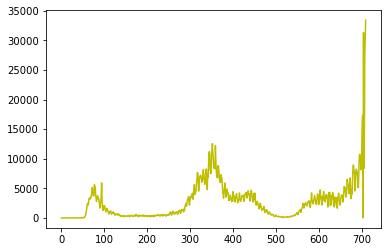

In [18]:
data_sample = data
x = np.array([i for i in range(len(data_sample))])
y = data_sample

plt.plot(
    x,
    y,
    color="y"
)

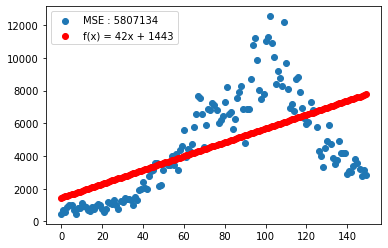

1674.2403368119358 [ 0.00000000e+00 -1.71564712e+02  6.49079303e+00 -5.17751499e-02
  1.06654124e-04]
[ 0.00000000e+00 -1.71564712e+02  6.49079303e+00 -5.17751499e-02
  1.06654124e-04]
f(x) = 0x^4 + -171x^3 + 6x^2 + 0x^1


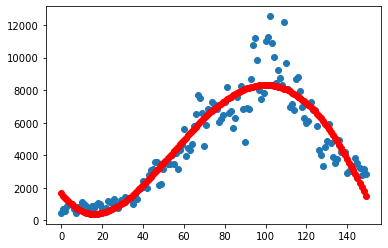

In [9]:
# 多项式回归分析 250～400 之间的数据
data_sample = data[400:00]

x = np.array([i for i in range(150)])
y = data_sample

from sklearn.linear_model import LinearRegression

X = x.reshape(-1,1)
lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_pred = lin_reg.predict(X)
a = lin_reg.intercept_
b = lin_reg.coef_
fb = int(a)
fk = int(b)
if fb >= 0:
    func = f"f(x) = {fk}x + {fb}"
elif fb < 0:
    func = f"f(x) = {fk}x {fb}"
temp0 = 0
for i in range(len(y)):
    temp0 += ((y_pred[i] - y[i]) ** 2)
MSE = temp0 / len(y)
plt.scatter(x, y, label=f'MSE : {int(MSE)}')
plt.scatter(x, y_pred, color = 'r', label=func)
plt.legend(loc='best')
plt.show()
from sklearn.preprocessing import PolynomialFeatures
degree=4
poly = PolynomialFeatures(degree) # 添加几次方特征
poly.fit(X)
X2 = poly.transform(X)

# 训练
lin_reg = LinearRegression()
lin_reg.fit(X2, y)

print(lin_reg.intercept_, lin_reg.coef_)
# print((lin_reg.coef_)*1000)
print(lin_reg.coef_)

func = f"f(x) = {int(lin_reg.coef_[0])}x^{degree} + {int(lin_reg.coef_[1])}x^{degree-1} + {int(lin_reg.coef_[2])}x^{degree -2} + {int(lin_reg.coef_[3])}x^{degree-3}"
print(func)
y_pred = lin_reg.predict(X2)
plt.scatter(x, y)
plt.scatter(x, y_pred, color = 'r')
plt.show()

In [ ]:
temp0 = 0
for i in range(len(y)):
    temp0 += ((y_pred[i] - y[i]) ** 2)
MSE = temp0 / len(y)

In [ ]:
MSE

1218814.4902200792

In [ ]:
int(lin_reg.coef_[1])

-171